In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy.stats import ttest_ind
import numpy as np

In [2]:
data_df = pd.read_csv('Score_df.csv')
data_df.head(3)

,dataset,filename,plain_utterances,scores,kf_ease,fh_ease,languages,kf_ease_avg,fh_ease_avg,lang_most
0,English_Bilingual_Age2_Audio,11221425.cha,['the boy and the dog were looking at the frog...,"[""English_Bilingual_Age2_Audio"", ""11221425.cha...","[103.625, 115.13000000000002, 103.54, 116.1450...","[130.64000000000001, 139.7, 131.18, 140.72, 10...","['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en...",100.113504,128.804432,en
1,English_Bilingual_Age2_Audio,11222222.cha,"['the boy went to sleep .', 'and the frog jump...","[""English_Bilingual_Age2_Audio"", ""11222222.cha...","[117.16000000000003, 103.70000000000002, 103.0...","[141.74, 130.99333333333334, 131.1285714285714...","['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en...",107.633048,134.322984,en
2,English_Bilingual_Age2_Audio,11222306.cha,['one night the boy and the dog were looking a...,"[""English_Bilingual_Age2_Audio"", ""11222306.cha...","[103.00500000000001, 103.04428571428575, 103.7...","[129.6, 131.12857142857143, 130.99333333333334...","['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en...",101.228104,129.348600,en


In [3]:
grouped_df = data_df.groupby('dataset').describe()

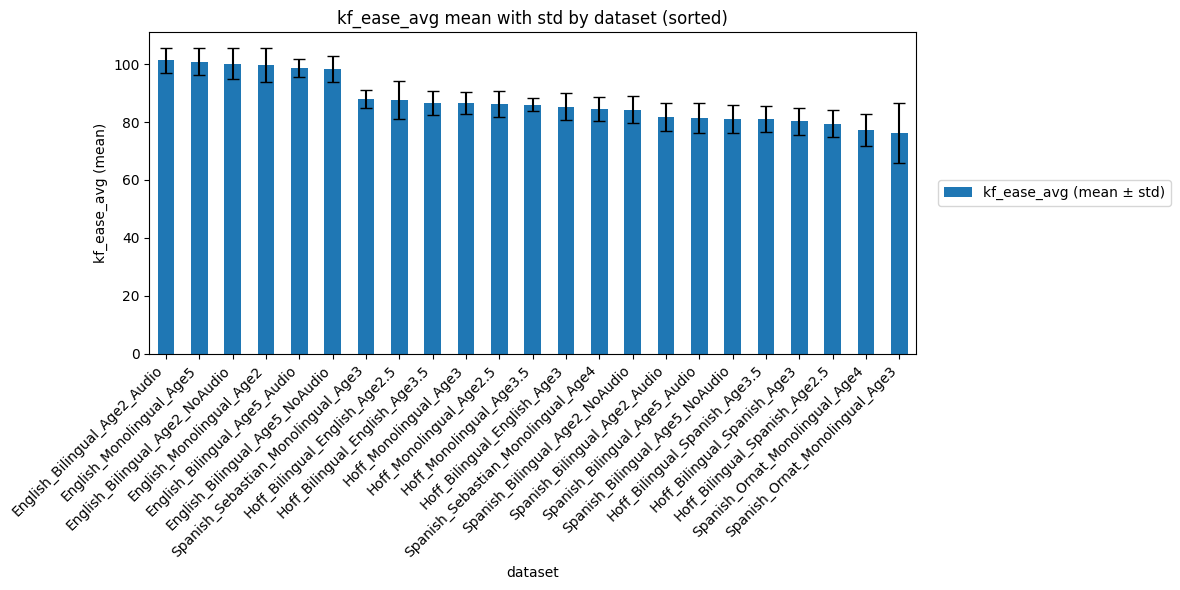

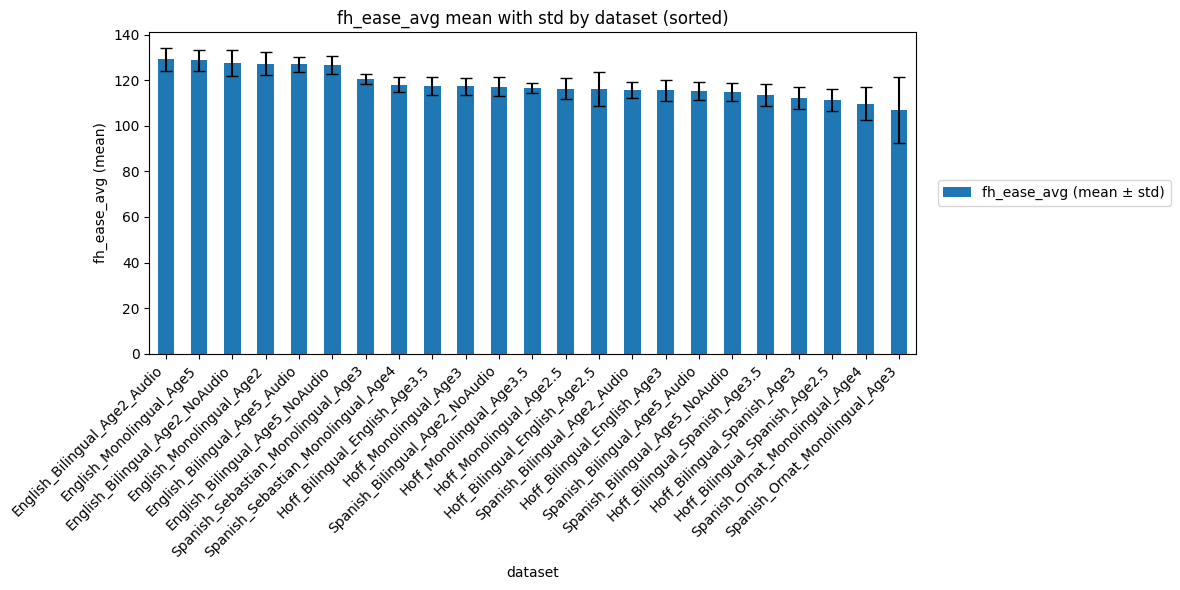

In [4]:
def make_plot(column_name, ascending=False):
    means = grouped_df[(column_name, 'mean')]
    stds = grouped_df[(column_name, 'std')]
    df_plot = pd.DataFrame({'mean': means, 'std': stds}).sort_values('mean', ascending=ascending)

    fig, ax = plt.subplots(figsize=(14,6))
    df_plot['mean'].plot(kind='bar', yerr=df_plot['std'], capsize=4, ax=ax, color='C0', label=f'{column_name} (mean ± std)')

    ax.set_ylabel(f'{column_name} (mean)')
    ax.set_title(f'{column_name} mean with std by dataset (sorted)')
    ax.set_xticklabels(df_plot.index, rotation=45, ha='right')

    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

# Sort descending by default (highest mean first). Set ascending=True for lowest-first.
make_plot("kf_ease_avg", ascending=False)
make_plot("fh_ease_avg", ascending=False)

In [11]:
def parse_dataset(ds):
    parts = ds.split('_')
    info = {}
    
    # splitting bilinguals from monolinguals
    if 'Bilingual' in parts:
        info['group'] = 'bilingual'
    elif 'Monolingual' in parts:
        info['group'] = 'monolingual'
    else:
        info['group'] = 'unknown'
    
    # splitting spanish and english
    if 'English' in parts:
        info['language'] = 'English'
    elif 'Spanish' in parts or 'Spanish' in ds:
        info['language'] = 'Spanish'
    else:
        info['language'] = 'Unknown'
    
    # In case we wanna see results by age
    age_part = [p for p in parts if p.startswith('Age')]
    if age_part:
        age_str = age_part[0].replace('Age', '')
        try:
            info['age_years'] = float(age_str)
        except ValueError:
            info['age_years'] = np.nan
    else:
        info['age_years'] = np.nan
    
    return pd.Series(info)

meta = data_df['dataset'].apply(parse_dataset)
data_df = pd.concat([data_df, meta], axis=1)

In [12]:
data_df.head()

,dataset,filename,plain_utterances,scores,kf_ease,fh_ease,languages,kf_ease_avg,fh_ease_avg,lang_most,group,language,age_years,group,language,age_years,group,language,age_years
0,English_Bilingual_Age2_Audio,11221425.cha,['the boy and the dog were looking at the frog...,"[""English_Bilingual_Age2_Audio"", ""11221425.cha...","[103.625, 115.13000000000002, 103.54, 116.1450...","[130.64000000000001, 139.7, 131.18, 140.72, 10...","['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en...",100.113504,128.804432,en,bilingual,English,2.0,bilingual,English,2.0,bilingual,English,2.0
1,English_Bilingual_Age2_Audio,11222222.cha,"['the boy went to sleep .', 'and the frog jump...","[""English_Bilingual_Age2_Audio"", ""11222222.cha...","[117.16000000000003, 103.70000000000002, 103.0...","[141.74, 130.99333333333334, 131.1285714285714...","['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en...",107.633048,134.322984,en,bilingual,English,2.0,bilingual,English,2.0,bilingual,English,2.0
2,English_Bilingual_Age2_Audio,11222306.cha,['one night the boy and the dog were looking a...,"[""English_Bilingual_Age2_Audio"", ""11222306.cha...","[103.00500000000001, 103.04428571428575, 103.7...","[129.6, 131.12857142857143, 130.99333333333334...","['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en...",101.228104,129.348600,en,bilingual,English,2.0,bilingual,English,2.0,bilingual,English,2.0
3,English_Bilingual_Age2_Audio,12122227.cha,"['the dog and the boy is sleeping .', 'the fro...","[""English_Bilingual_Age2_Audio"", ""12122227.cha...","[103.04428571428575, 92.965, 80.30636363636367...","[131.12857142857143, 123.68, 113.8018181818181...","['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en...",100.278569,129.532460,en,bilingual,English,2.0,bilingual,English,2.0,bilingual,English,2.0
4,English_Bilingual_Age2_Audio,12222013.cha,"['there was this boy .', ""he got a a pet that'...","[""English_Bilingual_Age2_Audio"", ""12222013.cha...","[118.17500000000001, 95.955, 90.99000000000004...","[142.76, 124.60000000000001, 123.78, 122.55714...","['en', 'en', 'en', 'en', 'en', 'en', 'en', 'en...",90.425742,113.723915,en,bilingual,English,2.0,bilingual,English,2.0,bilingual,English,2.0


In [13]:
# English info
df_en = data_df[
    (data_df["language"] == "English") &
    (data_df["group"].isin(["monolingual", "bilingual"]))
].copy()

df_en_mono = df_en[df_en["group"] == "monolingual"]["kf_ease_avg"].dropna()
df_en_bi   = df_en[df_en["group"] == "bilingual"]["kf_ease_avg"].dropna()

print("N English monolingual:", len(df_en_mono))
print("N English bilingual:", len(df_en_bi))


# Spanish info
df_es = data_df[
    (data_df["language"] == "Spanish") &
    (data_df["group"].isin(["monolingual", "bilingual"]))
].copy()

df_es_mono = df_es[df_es["group"] == "monolingual"]["fh_ease_avg"].dropna()
df_es_bi   = df_es[df_es["group"] == "bilingual"]["fh_ease_avg"].dropna()

print("N Spanish monolingual:", len(df_es_mono))
print("N Spanish bilingual:", len(df_es_bi))


C:\Users\20212693\AppData\Local\Temp\ipykernel_22060\3300286155.py:2: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df_en = data_df[


ValueError: cannot reindex on an axis with duplicate labels

In [14]:
comparison_en = pd.DataFrame({
    "Group": ["English Monolingual", "English Bilingual","Spanish Monolingual", "Spanish Bilingual"],
    "N samples": [len(df_en_mono), len(df_en_bi),len(df_es_mono), len(df_es_bi)],
    "Mean": [df_en_mono.mean(), df_en_bi.mean(), df_es_mono.mean(), df_es_bi.mean()],
    "Std": [df_en_mono.std(), df_en_bi.std(), df_es_mono.std(),df_es_bi.std()]
})
comparison_en

NameError: name 'df_en_mono' is not defined

In [15]:


groups = ["EN Mono", "EN Bi", "ES Mono", "ES Bi"]
means = [
    df_en_mono.mean(),
    df_en_bi.mean(),
    df_es_mono.mean(),
    df_es_bi.mean()
]
stds = [
    df_en_mono.std(),
    df_en_bi.std(),
    df_es_mono.std(),
    df_es_bi.std()
]

plt.figure(figsize=(10,6))
bars = plt.bar(groups, means, yerr=stds, capsize=6)

plt.ylabel("Reading scores (KF for EN, FH for ES)")
plt.title("Mean Readability by Group (Monolingual vs Bilingual)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



NameError: name 'df_en_mono' is not defined

In [ ]:

# simnple t-test and effect size
def cohens_d(a, b):
    return (a.mean() - b.mean()) / np.sqrt((a.std()**2 + b.std()**2)/2)

def print_group_stats(name, group1, group2):
    t_res = ttest_ind(group1, group2, equal_var=False)
    d = cohens_d(group1, group2)

    print(f"\n{name}")
    print(f"t-test:        t = {t_res.statistic:.3f}, p = {t_res.pvalue:.3e}")
    print(f"Cohen's d:     d = {d:.3f}")

print_group_stats("English tests", df_en_mono, df_en_bi)
print_group_stats("Spanis htests", df_es_mono, df_es_bi)



English tests
t-test:        t = 9.170, p = 5.901e-15
Cohen's d:     d = 1.227

Spanis htests
t-test:        t = 0.605, p = 5.480e-01
Cohen's d:     d = 0.117
